In [1]:
%matplotlib notebook
import numpy as np
import os, string
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import tensorflow as tf

xs = np.linspace(0,20,100)
ys = np.linspace(0,20,100)

In [2]:
X, Y = np.meshgrid(xs,ys)
A1 = 3.
mu1 = 7.
sigma1 = 13.
A2 = 6.
mu2 = 13.
sigma2 = 9.
x = A1 * np.exp(-(xs-mu1)**2/ sigma1) + A2 * np.exp(-(xs-mu2)**2/ sigma2)
y = A2 * np.exp(-(ys-mu1)**2/ sigma1) + A1 * np.exp(-(ys-mu2)**2/ sigma2)
#X, Y = np.meshgrid(x,y)
mesh = np.dot(np.mat(x).T , np.mat(y))

In [18]:
pnum = 100
pPos = np.mat(np.random.random((pnum,2)) * 20.)
#print(pPos)
pV = np.mat(-1. + np.random.random((pnum,2)) * 2.)#speed
#print(pV)
pBestPos = np.mat(pPos.copy())
pBestFit = np.mat(np.zeros((100,1)))
pFit = np.mat(pBestFit.copy())
gBestPos = np.mat(pPos[0,:].copy())
gFit = 0

In [19]:
for i in range(100):
    if i % 10 == 0:
        print(i)
        
    #update_par
    pPos += pV
    pPos[:,0] = np.minimum(pPos[:,0],20.)
    pPos[:,0] = np.maximum(pPos[:,0],0.)
    pPos[:,1] = np.minimum(pPos[:,1],20.)
    pPos[:,1] = np.maximum(pPos[:,1],0.)
    tmp1 = A1 * np.exp(-np.square(pPos[:,0]-mu1)/ sigma1) + A2 * np.exp(-np.square(pPos[:,0]-mu2)/ sigma2)
    tmp2 = A2 * np.exp(-np.square(pPos[:,1]-mu1)/ sigma1) + A1 * np.exp(-np.square(pPos[:,1]-mu2)/ sigma2)
    pFit = np.multiply(tmp1,tmp2 )
    #print(pFit)
    #print(pFit.shape)
    #par.vx=par.vx+c1*rand()*(par_best.x-par.x)+c2*rand()*(par.bestx-par.x)
    #print((np.dot(np.random.random((100)), (pBestPos[:,0]-pPos[:,0]))).shape)
    #print(np.subtract(gBestPos[0,0],pPos[:,0]).shape)
    pV[:,0] += np.multiply(np.random.random((100,1)), (pBestPos[:,0]-pPos[:,0]))
    pV[:,0] += np.multiply(np.random.random((100,1)), (gBestPos[0,0]-pPos[:,0]))
    pV[:,1] += np.multiply(np.random.random((100,1)), (pBestPos[:,1]-pPos[:,1]))
    pV[:,1] += np.multiply(np.random.random((100,1)), (gBestPos[0,1]-pPos[:,1]))
    #print(pV)
    logic = np.array(pFit) > np.array(pBestFit)
    ind = np.array(np.where(logic!=False)[0])
    #logic = np.array(logic.flatten())
    #print(ind.shape)
    #print(ind)
    pBestFit[ind] = pFit[ind,0]
    pBestPos[ind,:] = pPos[ind,:]

    if gFit < np.max(pBestFit):
        ind = np.argmax(pBestFit)
        print(i,ind)
        gFit = pBestFit[ind]
        gBestPos = pBestPos[ind]
        print(gBestPos,gFit)
   

0
0 32
[[ 14.30325497   6.36275102]] [[ 29.29290833]]
1 35
[[ 12.53435977   8.36709679]] [[ 33.61177644]]
2 30
[[ 12.83391624   6.76165638]] [[ 37.2870188]]
4 14
[[ 12.81436737   7.19602298]] [[ 37.52938405]]
6 56
[[ 12.87202212   7.05942175]] [[ 37.56181815]]
8 0
[[ 12.8584634    7.07107067]] [[ 37.56421685]]
10
13 61
[[ 12.86626908   7.08281564]] [[ 37.56444136]]
14 53
[[ 12.84609031   7.08527058]] [[ 37.56472674]]
20
30
40
40 64
[[ 12.85578812   7.07999967]] [[ 37.56483442]]
50
60
70
80
90


<IPython.core.display.Javascript object>


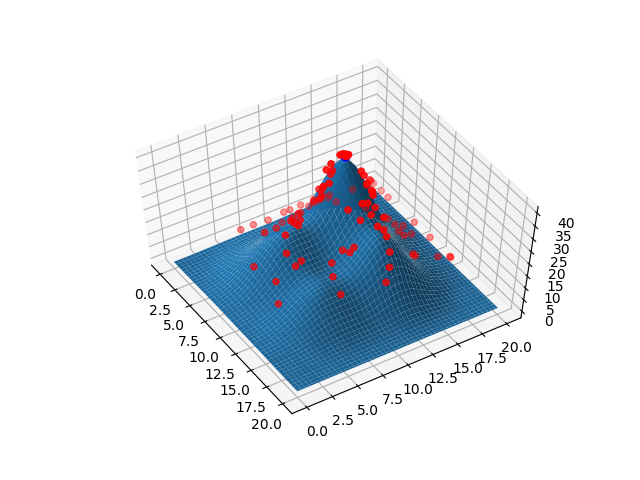

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,mesh)
ax.scatter(np.array(pPos[:,1]),np.array(pPos[:,0]),np.array(pFit+2.),s=20, c='r')
ax.scatter(np.array(gBestPos[:,1]),np.array(gBestPos[:,0]),np.array(gFit+2.),s=40, c='b')

In [7]:
with tf.device('/gpu:0'):
    pX = tf.Variable(tf.random_normal([100,]))
    pY = tf.Variable(tf.random_normal([100,]))
    pVX = tf.Variable(tf.random_normal([100,]))
    pVY = tf.Variable(tf.random_normal([100,]))
    pBestX = pX
    pBestY = pY
    pBestFit = tf.Variable(tf.zeros([100,]))
    pFit = tf.Variable(tf.zeros([100,]))
    gBestX = tf.Variable([0.])
    gBestY = tf.Variable([0.])
    gFit = tf.Variable([0.])
    
config = tf.ConfigProto(allow_soft_placement = True)
sess = tf.InteractiveSession(config = config)
sess.run(tf.global_variables_initializer())

In [9]:
#for i in range(20):
gBestX = pX[0]
gBestY = pY[0]
pX += pVX
pY += pVY
pX = tf.minimum(pX,20.)
pY = tf.minimum(pY,20.)
pX = tf.maximum(pX,0.)
pY = tf.maximum(pY,0.)
tmp1 = A1 * tf.exp(-tf.square(pX - mu1) / sigma1) + A2 * tf.exp(-tf.square(pX-mu2)/ sigma2)
tmp2 = A2 * tf.exp(-tf.square(pY-mu1)/ sigma1) + A1 * tf.exp(-tf.square(pY-mu2)/ sigma2)
pFit = tf.multiply(tmp1,tmp2)
pVX += tf.multiply(tf.random_uniform((100,1)), (pBestX-pX))
pVX += tf.multiply(tf.random_uniform((100,1)), (gBestX-pX))
pVY += tf.multiply(tf.random_uniform((100,1)), (pBestY-pY))
pVY += tf.multiply(tf.random_uniform((100,1)), (gBestY-pY))
#print(pFit.eval())
#pVX.eval()
#pVY.eval()
logic = pFit > pBestFit
print(logic.eval())
#ind = tf.where(logic)
#ind = tf.reshape(ind,(ind.get_shape()[0],))
#print(ind.eval())
pBestFit  = tf.where(logic,pFit, pBestFit)
pBestX  = tf.where(logic,pX, pBestX)
pBestY  = tf.where(logic,pY, pBestY)
pmaxBestFit = tf.reduce_max(pBestFit)
print(pmaxBestFit.eval())
boolCond = tf.greater(pmaxBestFit,gFit)
print(boolCond.eval())
#gFit = tf.cond(tf.greater(pmaxBestFit,gFit), lambda: tf.constant(0.), lambda : tf.constant(1.))
#gBestX = tf.cond(boolCond, lambda: pBestX[tf.arg_max(pBestFit)], lambda: tf.abs(gBestX))
#gBestY = tf.cond(boolCond, lambda: pBestY[tf.arg_max(pBestFit)], lambda: tf.abs(gBestY))
#gFit = tf.cond(boolCond, lambda: tf.abs(pmaxBestFit), lambda : tf.abs(gFit))
#gFit.eval()
#gBestX.eval()
#gBestY.eval()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
0.440649
[ True]


In [18]:
print(gFit.eval(),tf.constant(0.).shape)
def f1(): return tf.constant(0.)
def f2(): return tf.constant(1.)
gFit = tf.cond(tf.greater(pmaxBestFit,gFit), f1, f2)

[ 0.] ()


ValueError: Shape must be rank 0 but is rank 1 for 'cond_2/Switch' (op: 'Switch') with input shapes: [1], [1].

In [ ]:
sess.close()